In [55]:
#Exercise 1: example
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from classy import Class
cosmo = {}
cBvec = [0., 0.625, 1.25, 1.875, 2.5]
print cBvec
for cB in cBvec:
    # c_K, c_B, c_M, c_T, M*_ini
    gravitypars = [1., cB, 0., 0., 1.]
    cosmo[cB] = Class()
    cosmo[cB].set({
        'output':'tCl, lCl, mPk',
        'P_k_max_h/Mpc':10.0,
        'lensing':'yes',
        'Omega_Lambda':0, # no cosmological constant
        'Omega_fld':0, # no perfect fluid DE
        'Omega_smg':-1, # use closure relation to find the density of modified gravity
        'gravity_model':'propto_omega',
        'parameters_smg':str(gravitypars).strip('[]'), #vector with the model parameters
        'expansion_model':'lcdm', #model for rho_smg(z)
        'expansion_smg':0.5}) #vector with expansion parameters (one varied to adjust Omega_smg)
    cosmo[cB].compute()

[0.0, 0.625, 1.25, 1.875, 2.5]


In [56]:
print cosmo

{0.0: <classy.Class object at 0x101a03c20>, 0.625: <classy.Class object at 0x13acb9420>, 2.5: <classy.Class object at 0x101a11c20>, 1.25: <classy.Class object at 0x13ae07420>, 1.875: <classy.Class object at 0x13ae19420>}


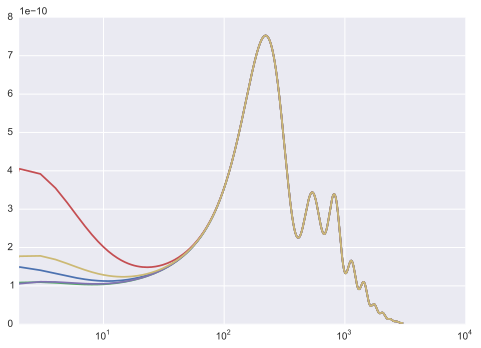

In [57]:
plt.figure()
for model in cosmo:
    cl=cosmo[model].raw_cl()
    l=cl['ell']
    plt.semilogx(l, l*(l+1)/(2.*np.pi)*cl['tt'])
plt.xlim(2, 1e4)
plt.show()

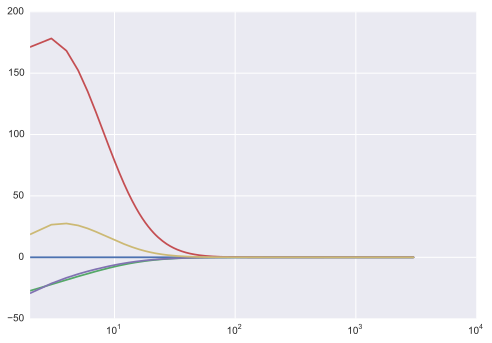

In [58]:
for model in cosmo:
    cl=cosmo[model].raw_cl()
    cl_0=cosmo[0].raw_cl()
    l=cl['ell']
    plt.semilogx(l, ((cl['tt']-cl_0['tt'])*100./cl_0['tt']))
plt.xlim(2, 1e4)
plt.ylim(-50, 200)
plt.show()

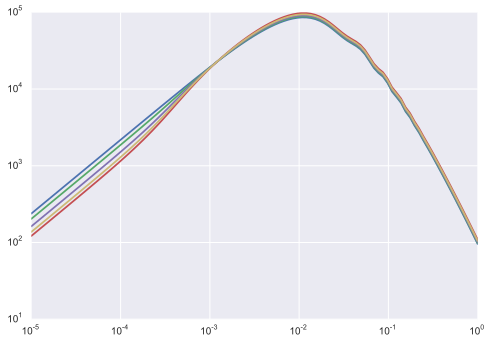

In [59]:
k=np.logspace(-5,0,100)
for model in cosmo:
    pkvec  = np.array([cosmo[model].pk(kk,0.) for kk in k])
    plt.loglog(k, pkvec)

plt.show()

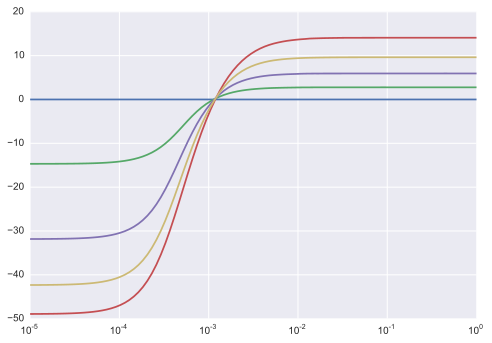

In [60]:
k=np.logspace(-5,0,100)
for model in cosmo:
    pkvec  = np.array([cosmo[model].pk(kk,0.) for kk in k])
    pkvec_diff = pkvec - np.array([cosmo[0].pk(kk,0.) for kk in k])
    plt.semilogx(k, pkvec_diff*100/np.array([cosmo[0].pk(kk,0.) for kk in k]))

plt.show()

In [ ]:
#Exercise 2:
cosmo[model].get_background()